In [95]:
import pandas as pd
import os
import numpy as np
from dython.nominal import associations

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Project summary:
1. Business understanding:
    - Most popular neighborhood in Boston?
    - Which characteristics relate (not determined) the most to the price of the listing?
    - Can we predict if a listing will be successful?

2. Data understanding & Preparation (wrangling):
    - Assess datasets
    - Curate dateset if needed
    - Enrich dataset if needed

3. Model & Vizualization (analysis):
    - Analyze data
    - Create ML model for prediction
    - Plot results and/or intermediate results to answer our questions

4. Evaluation:
    - model evaluation

5. Insight sharing
     - blog post



## 1.Explore datasets

>*After reviewing the content of the different provided datasets, I opted for the one with Airbnb listings contents.
Curious to know a little bit more about the underlying success of Airbnb in Boston.
We will first look at how temporary housing rental looks like in each neighborhood in Boston.
Then looking for some opportunities, we'll try to determine the main drivers for a listing price.
Finally, we'll try to predict the success of a listing in airbnb.*

## 2.Data understanding & Preparation (wrangling)

### 2.1 Assessment of data

In [96]:
df_listings = pd.read_csv('../data/airbnb_listings_boston/listings.csv')

df_reviews= pd.read_csv('../data/airbnb_listings_boston/reviews.csv')

df_calendar = pd.read_csv('../data/airbnb_listings_boston/calendar.csv')

In [97]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [98]:
# shape of dataset
df_listings.shape

# summary statistics for listings dataset
df_listings.describe()
# shape of dataset
df_listings.shape

# summary statistics for quant vars from listings dataset
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


### 2.2 Enrich dataset

In [99]:
# To answer one of our questions, we will add Availability (from calendar dataset) to listings dataset
# Availability will be key to determine the success of a listing - required for our model predictions

df_calendar_all = df_calendar[['listing_id','available']]

# add nights not available
df_not_available = df_calendar_all.loc[(df_calendar_all['available'] == 'f') & (df_calendar_all['listing_id'])].groupby('listing_id').count().reset_index()

df_not_available = df_not_available.rename(columns={'available': 'nights_not_available'})

# add nights available
df_available = df_calendar_all.loc[(df_calendar_all['available'] == 't') & (df_calendar_all['listing_id'])].groupby('listing_id').count().reset_index()

df_available = df_available.rename(columns={'available': 'nights_available'})

# rename for merge of 2 datasets
df_listings = df_listings.rename(columns={'id': 'listing_id'})


# merger
df_listings_new = df_listings.join(df_not_available.set_index('listing_id')[['nights_not_available']], on='listing_id')

df_listings_new = df_listings_new.join(df_available.set_index('listing_id')[['nights_available']], on='listing_id')


# Refine availability criteria used as key factor of success. using availability variables provided at 30,60, 90 and 365 days instead
# Add percentage availability over binned period (30,60,90 days)

df_listings_new['perc_non_availability_30'] =  1 - (df_listings_new['availability_30'] / 30)
df_listings_new['perc_non_availability_60'] =  1 - (df_listings_new['availability_60'] / 60)
df_listings_new['perc_non_availability_90'] =  1 - (df_listings_new['availability_90'] / 90)
df_listings_new['perc_non_availability_365'] = 1 - (df_listings_new['availability_365'] / 365)


df_listings_new.head()


,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,nights_not_available,nights_available,perc_non_availability_30,perc_non_availability_60,perc_non_availability_90,perc_non_availability_365
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,f,1,NaN,365.0,NaN,1.000000,1.000000,1.000000,1.000000
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,f,1,1.30,NaN,NaN,0.133333,0.100000,0.066667,0.016438
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,t,f,1,0.47,NaN,NaN,0.366667,0.233333,0.322222,0.126027
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,f,1,1.00,267.0,98.0,0.800000,0.733333,0.711111,0.731507
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,f,1,2.25,31.0,334.0,0.566667,0.433333,0.344444,0.084932


### 2.3 Curate dataset

In [100]:
# Convert price format (currency) to integer
# This will enable us to use price as a variable in our model

df_listings_new['price'] = df_listings_new['price'].fillna(0.0).str.replace('[$,]','',regex=True).astype('float')

In [101]:
# Keep only relevant features used in analysis

# get quantitative variables
quantitative_vars_cols = df_listings_new.describe().columns

df_listing_quant_vars = df_listings_new[quantitative_vars_cols]

# drop irrelevant vars - not used in analysis
df_listing_quant_vars = df_listing_quant_vars.drop(['listing_id','scrape_id','host_id','jurisdiction_names'],axis=1)

# drop relevant vars returning missing/nan values - possibly adding noise to our analysis
df_listing_quant_vars = df_listing_quant_vars.drop(['neighbourhood_group_cleansed','square_feet','license','has_availability'],axis=1)

In [102]:
# Various variables are still returning some missing values
# We keep them in dataset at this stage but will probably not use them to answer our questions.
df_listing_quant_vars.isna().sum()

host_listings_count                  0
host_total_listings_count            0
latitude                             0
longitude                            0
accommodates                         0
bathrooms                           14
bedrooms                            10
beds                                 9
price                                0
guests_included                      0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating               813
review_scores_accuracy             823
review_scores_cleanliness          818
review_scores_checkin              820
review_scores_communication        818
review_scores_location             822
review_scores_value                821
calculated_host_listings_count       0
reviews_per_month        

## 3. Analysis

#### 3.1 What are the most demanded neighborhood in Boston?

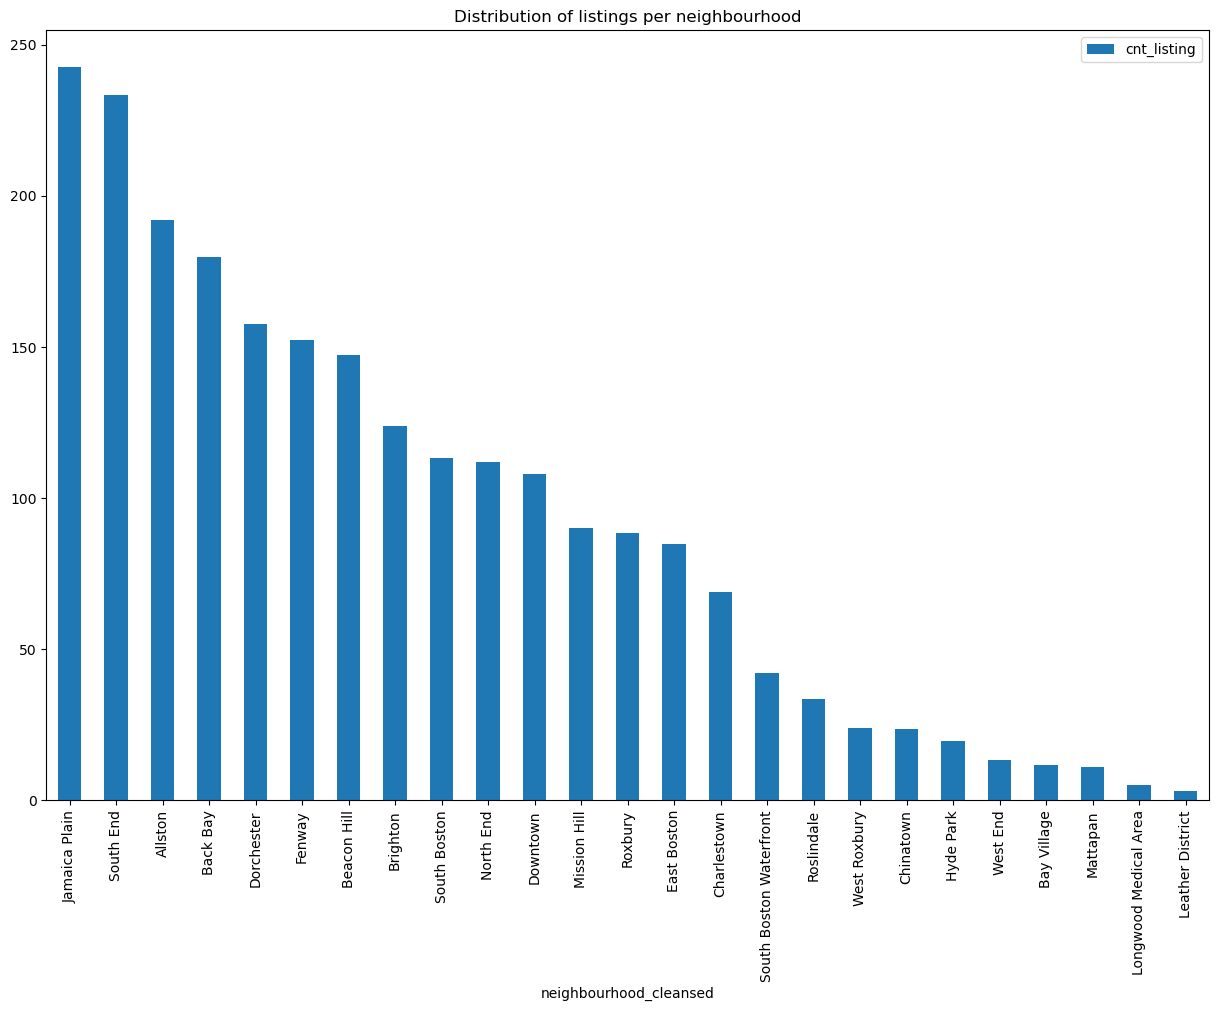

In [103]:
dfq1 = df_listings_new[['listing_id','neighbourhood_cleansed','perc_non_availability_30','perc_non_availability_60','perc_non_availability_90','perc_non_availability_365']]


dfq1.groupby(['neighbourhood_cleansed']).agg({'perc_non_availability_60':'sum'}).rename(columns={'perc_non_availability_60':"cnt_listing"}).sort_values(by='cnt_listing',ascending=False).plot.bar(title='Distribution of listings per neighbourhood',figsize=(15,10));


>Clearly, Jamaican Pain and South end are the most popular districts in Boston, at least in terms of rental offers (listings).
The two districts concentrate a bit more than 10% of the total listings published in the city.
Let's see now how does it translate into effective occupation. One would expect the places with abundant offers to reflect in a high occupation rate, let's see if we can validate this hypothesis.


#### 3.2 Does occupation rate varies per location?


In [104]:
# in dfq1 we kept various indicators of occupation rate based on different periods
# Considering an annual occupation rate might not be the best measurment of success of a listing given the various situations where a listing is expected to be available (ie.off season, renovation,etc.)
# Therefore, we decided to use in our analysis the occupation rate at 60days as good intermediate between 30d and 365d, at least at this stage of our analysis.

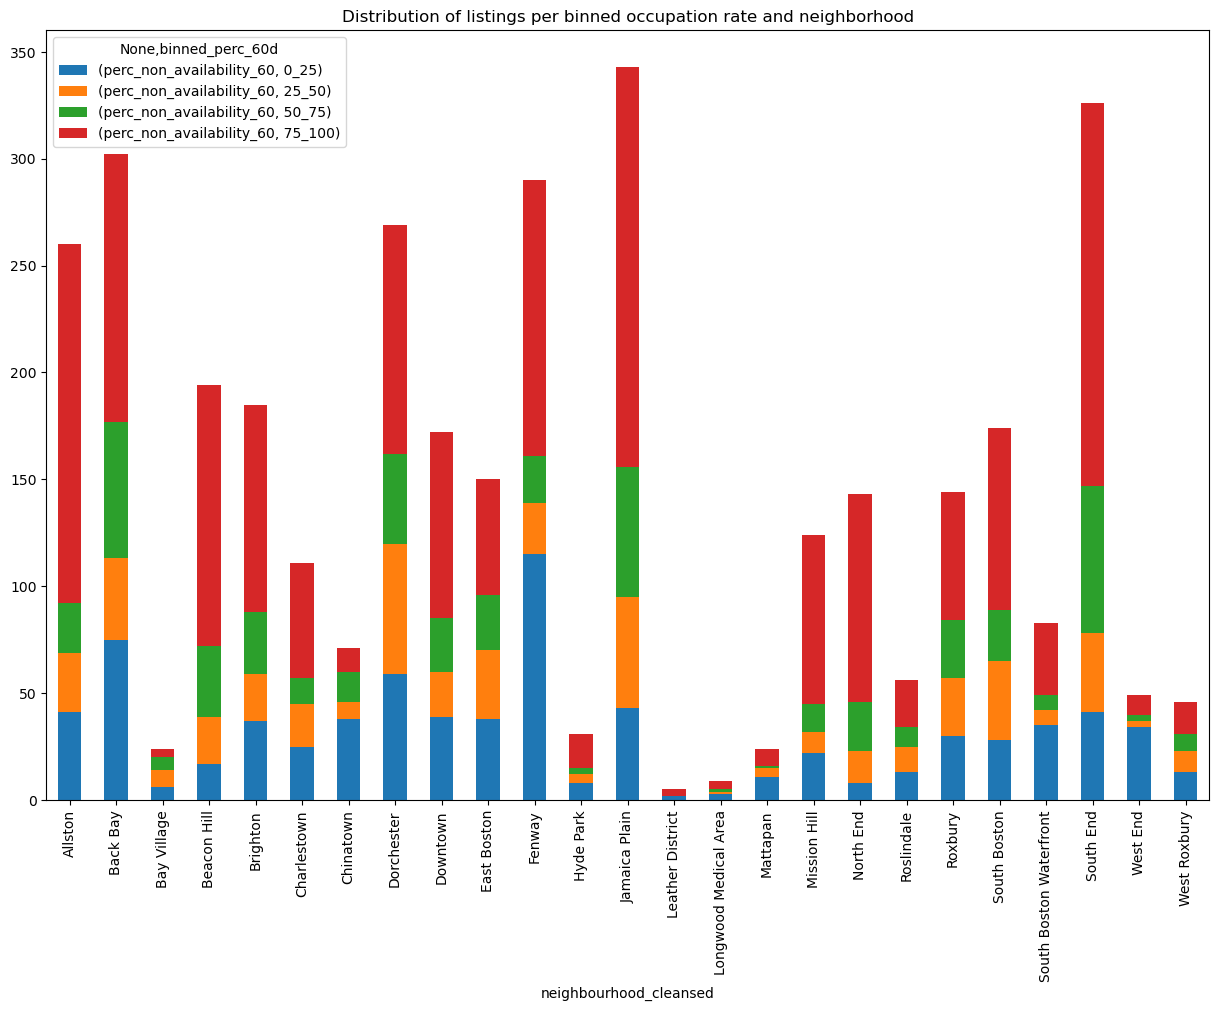

In [105]:
# occupation rate: % of days not available over 60d period
dfq1_final = dfq1[['neighbourhood_cleansed','perc_non_availability_60']].copy()

dfq1_final.groupby(['neighbourhood_cleansed','perc_non_availability_60'])['perc_non_availability_60'].count()

# to facilitate the analysis, occupation rate will bucketed into 4 groups
# occupation rate below 25% would be considered as the least "demanded" listings
# occupation rate >75 % would be considered as the most "demanded" listings
dfq1_final.loc[dfq1_final['perc_non_availability_60'].between(0.0,0.25,'both'),'binned_perc_60d'] = '0_25'
dfq1_final.loc[dfq1_final['perc_non_availability_60'].between(0.25,0.50,'right'),'binned_perc_60d'] = '25_50'
dfq1_final.loc[dfq1_final['perc_non_availability_60'].between(0.50,0.75,'right'),'binned_perc_60d'] = '50_75'
dfq1_final.loc[dfq1_final['perc_non_availability_60'].between(0.75,1.0,'right'),'binned_perc_60d'] = '75_100'


dfq1_final = dfq1_final.groupby(['neighbourhood_cleansed','binned_perc_60d']).count().reset_index()

# plot for each neighborhood the # of listings for each occupation rate bin
pd.pivot_table(
                    dfq1_final,
                    index=['neighbourhood_cleansed'],
                    columns=['binned_perc_60d'],
                    values=['perc_non_availability_60']).\
    plot.bar(stacked=True, figsize=(15,10), title='Distribution of listings per binned occupation rate and neighborhood');



>Surprisingly, distribution of listings per occupation rate does not differ much cross neighbourhood.
One would expect high demand neighborhood, would have a much higher % of listings with occupation rate > 75% but across all districts, distribution is very similar.
No major difference between high/med/low demand.

#### 3.3 Does the location or the price contribute to determine the success of our listing?

In [106]:
# run a correlation analysis between availability 60 and other quantitative variables in dataset
# interested in price and location mostly but keeping an eye on other vars
df_listing_quant_vars.corr()[['availability_60']].sort_values(by='availability_60', ascending=False)

,availability_60
availability_60,1.000000
availability_90,0.964731
availability_30,0.941706
availability_365,0.557093
host_listings_count,0.420898
host_total_listings_count,0.420898
calculated_host_listings_count,0.416057
nights_available,0.394570
price,0.112577
bathrooms,0.108912


>No strong correlation (>0.5) between availability 60 and other variables of interest in dataset (ie.location, price). The fact that location is expressed as lat/long here is maybe the reason.
Surprisingly, low correlation with features relating to the rental place characteristics (# of rooms, bathrooms # of people to accommodate)
square feet would probably be positively correlated with price but has been removed since returning missing values for most of the listing in dataset.
> Some medium correlation with host listings count. Interesting, as host type (ie professional vs individual) might play a role in occupation rate.


Case for features engineering:
One would expect Location to be a dependent variable of price. However, we'll need to handle the categorical variable values obtained from original dataset and transform it as a quantitative variable that will be included in our correlation analysis.

In [107]:
X = df_listings_new['neighbourhood_cleansed']

X = pd.get_dummies(data=X, drop_first=True)

df_listings_new = pd.merge(df_listings_new, X, left_index=True, right_index=True)

df_listings_new.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Mattapan,Mission Hill,North End,Roslindale,Roxbury,South Boston,South Boston Waterfront,South End,West End,West Roxbury
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,0,0,0,1,0,0,0,0,0,0
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,0,0,0,1,0,0,0,0,0,0
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,0,0,0,1,0,0,0,0,0,0
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,0,0,0,1,0,0,0,0,0,0
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,0,0,0,1,0,0,0,0,0,0


In [108]:
# get list of neighborhoods
location_list = df_listings_new['neighbourhood_cleansed'].unique()
location_list

array(['Roslindale', 'Jamaica Plain', 'Mission Hill',
       'Longwood Medical Area', 'Bay Village', 'Leather District',
       'Chinatown', 'North End', 'Roxbury', 'South End', 'Back Bay',
       'East Boston', 'Charlestown', 'West End', 'Beacon Hill',
       'Downtown', 'Fenway', 'Brighton', 'West Roxbury', 'Hyde Park',
       'Mattapan', 'Dorchester', 'South Boston Waterfront',
       'South Boston', 'Allston'], dtype=object)

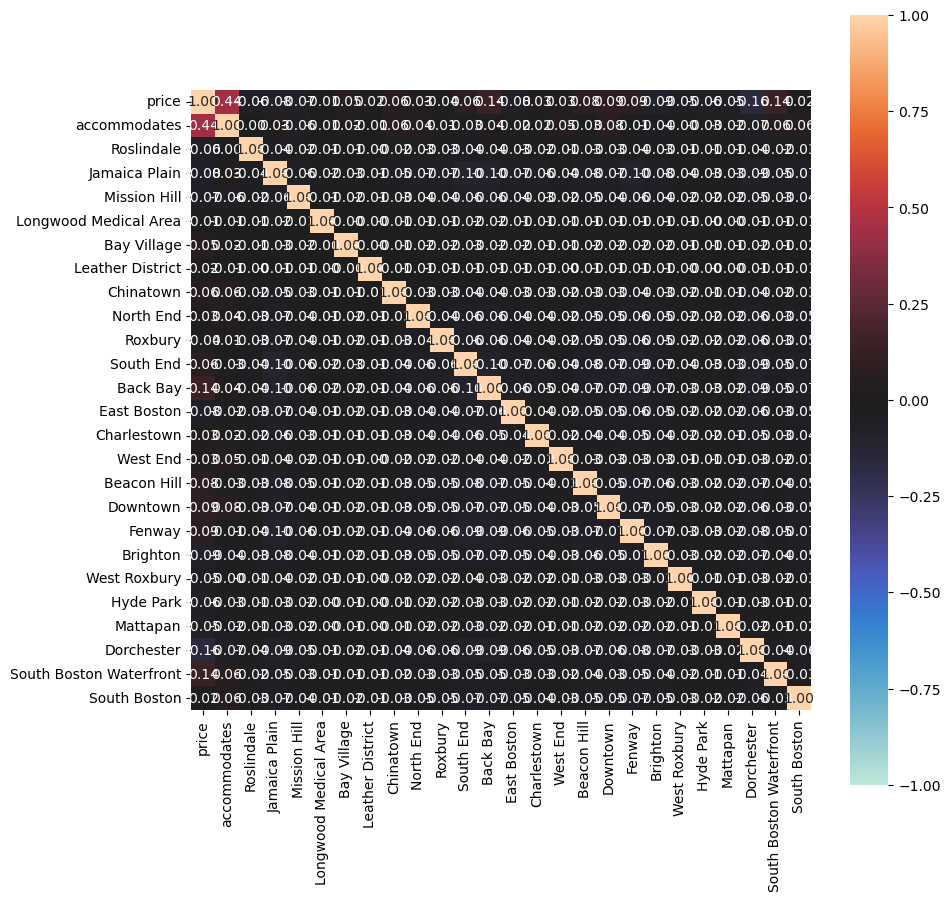

{'corr':                             price  accommodates  Roslindale  Jamaica Plain  \
 price                    1.000000      0.437756   -0.064125      -0.077742   
 accommodates             0.437756      1.000000    0.002135       0.028705   
 Roslindale              -0.064125      0.002135    1.000000      -0.040974   
 Jamaica Plain           -0.077742      0.028705   -0.040974       1.000000   
 Mission Hill            -0.066312     -0.064467   -0.023844      -0.061567   
 Longwood Medical Area   -0.012002     -0.010566   -0.006320      -0.016318   
 Bay Village              0.051428      0.023095   -0.010342      -0.026703   
 Leather District         0.020077     -0.005070   -0.004708      -0.012156   
 Chinatown                0.055997      0.055230   -0.017906      -0.046235   
 North End                0.029895      0.040145   -0.025676      -0.066298   
 Roxbury                 -0.038059      0.010427   -0.025770      -0.066539   
 South End                0.064880     -0.02

In [109]:
# rerun correlation analysis after transformation of location variable

df_listings_cat2 = df_listings_new.copy()
df_listings_cat2 = df_listings_cat2[['price','accommodates','Roslindale', 'Jamaica Plain', 'Mission Hill',
       'Longwood Medical Area', 'Bay Village', 'Leather District','Chinatown', 'North End', 'Roxbury', 'South End', 'Back Bay', 'East Boston', 'Charlestown', 'West End', 'Beacon Hill','Downtown', 'Fenway', 'Brighton', 'West Roxbury', 'Hyde Park','Mattapan', 'Dorchester', 'South Boston Waterfront','South Boston']]

# plot results
complete_correlation= associations(df_listings_cat2, filename= 'correlation', figsize=(10,10));
# return results
complete_correlation

> Not too insightful and hard to read after data transformation.
> Let's see if we can actually implement a ML model using all the data gathered and prepared already.

#### 3.4 Can we predict if a listing will be successful?

In [110]:
# get quantitative variables v2 (after get dummy)
quantitative_vars_cols2 = df_listings_new.describe().columns

df_listing_quant_vars2 = df_listings_new[quantitative_vars_cols2]

df_listing_quant_vars2.head()

,listing_id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,Mattapan,Mission Hill,North End,Roslindale,Roxbury,South Boston,South Boston Waterfront,South End,West End,West Roxbury
0,12147973,20160906204935,31303940,1,1,NaN,42.282619,-71.133068,4,1.5,...,0,0,0,1,0,0,0,0,0,0
1,3075044,20160906204935,2572247,1,1,NaN,42.286241,-71.134374,2,1.0,...,0,0,0,1,0,0,0,0,0,0
2,6976,20160906204935,16701,1,1,NaN,42.292438,-71.135765,2,1.0,...,0,0,0,1,0,0,0,0,0,0
3,1436513,20160906204935,6031442,1,1,NaN,42.281106,-71.121021,4,1.0,...,0,0,0,1,0,0,0,0,0,0
4,7651065,20160906204935,15396970,1,1,NaN,42.284512,-71.136258,2,1.5,...,0,0,0,1,0,0,0,0,0,0


In [111]:
df_listing_quant_vars_model = df_listing_quant_vars2[df_listing_quant_vars2.notnull()]

In [112]:
df_listing_quant_vars_model.isna().sum()

listing_id                   0
scrape_id                    0
host_id                      0
host_listings_count          0
host_total_listings_count    0
                            ..
South Boston                 0
South Boston Waterfront      0
South End                    0
West End                     0
West Roxbury                 0
Length: 64, dtype: int64

In [113]:
df_listing_quant_vars_model = df_listing_quant_vars_model.apply(lambda x: x.fillna(x.mean()))

In [114]:
X.isna().sum()

Back Bay                   0
Bay Village                0
Beacon Hill                0
Brighton                   0
Charlestown                0
Chinatown                  0
Dorchester                 0
Downtown                   0
East Boston                0
Fenway                     0
Hyde Park                  0
Jamaica Plain              0
Leather District           0
Longwood Medical Area      0
Mattapan                   0
Mission Hill               0
North End                  0
Roslindale                 0
Roxbury                    0
South Boston               0
South Boston Waterfront    0
South End                  0
West End                   0
West Roxbury               0
dtype: int64

In [115]:
# pick up variables for training our model
X = df_listing_quant_vars_model[['host_listings_count','price','accommodates','bathrooms','bedrooms','beds','Roslindale', 'Jamaica Plain', 'Mission Hill',
       'Longwood Medical Area', 'Bay Village', 'Leather District',
       'Chinatown', 'North End', 'Roxbury', 'South End', 'Back Bay',
       'East Boston', 'Charlestown', 'West End', 'Beacon Hill',
       'Downtown', 'Fenway', 'Brighton', 'West Roxbury', 'Hyde Park',
       'Mattapan', 'Dorchester', 'South Boston Waterfront',
       'South Boston']]

# pick up occupation rate as target value
y = df_listing_quant_vars_model['perc_non_availability_60']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instantiating the model
lrmodel = LinearRegression()

#training the algorithm
lrmodel.fit(X_train, y_train);

# To retrieve the intercept:
#print(lrmodel.intercept_)

#For retrieving the slope:
#print(lrmodel.coef_)

In [116]:
y_preds = lrmodel.predict(X_test)

y_test = np.array(list(y_test))
y_preds = np.array(y_preds)

dfr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_preds.flatten()})


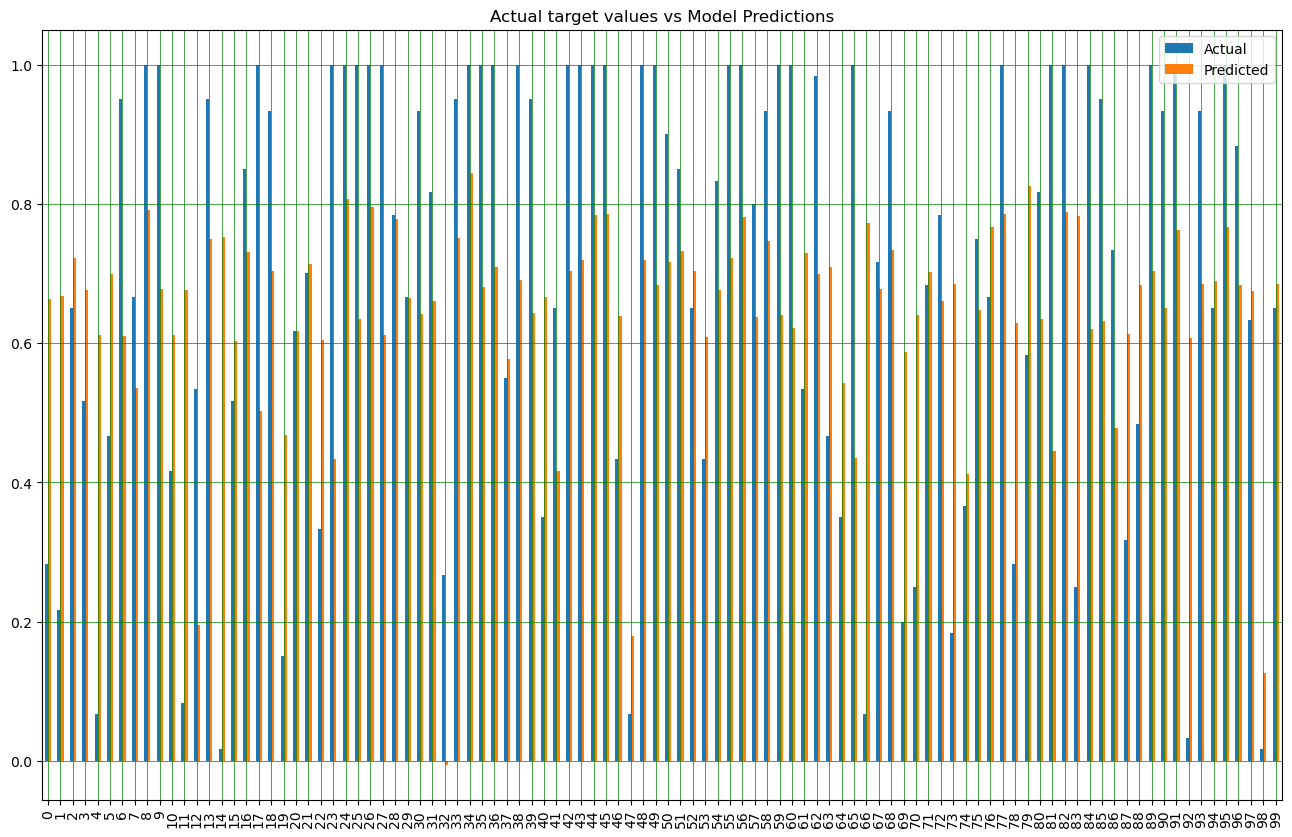

In [117]:
df1 = dfr.head(100)
df1.plot(kind='bar',figsize=(16,10),title='Actual target values vs Model Predictions')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [118]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))

Mean Absolute Error: 0.2745639363044698
Mean Squared Error: 0.10569365023009385
Root Mean Squared Error: 0.3251055985831278


In [85]:
X.head()

,host_listings_count,price,accommodates,bathrooms,bedrooms,beds,Roslindale,Jamaica Plain,Mission Hill,Longwood Medical Area,...,Beacon Hill,Downtown,Fenway,Brighton,West Roxbury,Hyde Park,Mattapan,Dorchester,South Boston Waterfront,South Boston
0,1,250.0,4,1.5,2.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,65.0,2,1.0,1.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,65.0,2,1.0,1.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,75.0,4,1.0,1.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,79.0,2,1.5,1.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
